In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# importing important libs
import pandas as pd
import numpy as np
from random import shuffle
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from wordcloud import WordCloud, STOPWORDS 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
import os
from tqdm.notebook import tqdm
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Embedding
import warnings
warnings.filterwarnings('ignore')
#sklearn package 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn. preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB,MultinomialNB,GaussianNB 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#model evaluation
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,recall_score,precision_score,f1_score


from keras.models import Sequential
from keras.layers import *
from keras.preprocessing.sequence import pad_sequences
import gensim
import sys
import numpy as np
import pandas as pd
import string
import logging
import random
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("news-data.csv")
#df_test = pd.read_csv("news-data.csv", names=COLUMNS_TEST, skipinitialspace=True, skiprows=1, engine="python")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
df.shape

(2225, 2)

In [4]:
df.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
print("The shape of the dataset-------->",df.shape)
print("The number of null values ------>")
print(df.isnull().sum())
column = df.columns
print("The column present there-------->",column)

The shape of the dataset--------> (2225, 2)
The number of null values ------>
category    0
text        0
dtype: int64
The column present there--------> Index(['category', 'text'], dtype='object')


In [7]:
print("The total number category present here------------->",df['category'].nunique())
category=df['category'].value_counts()
print(category)

The total number category present here-------------> 5
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64


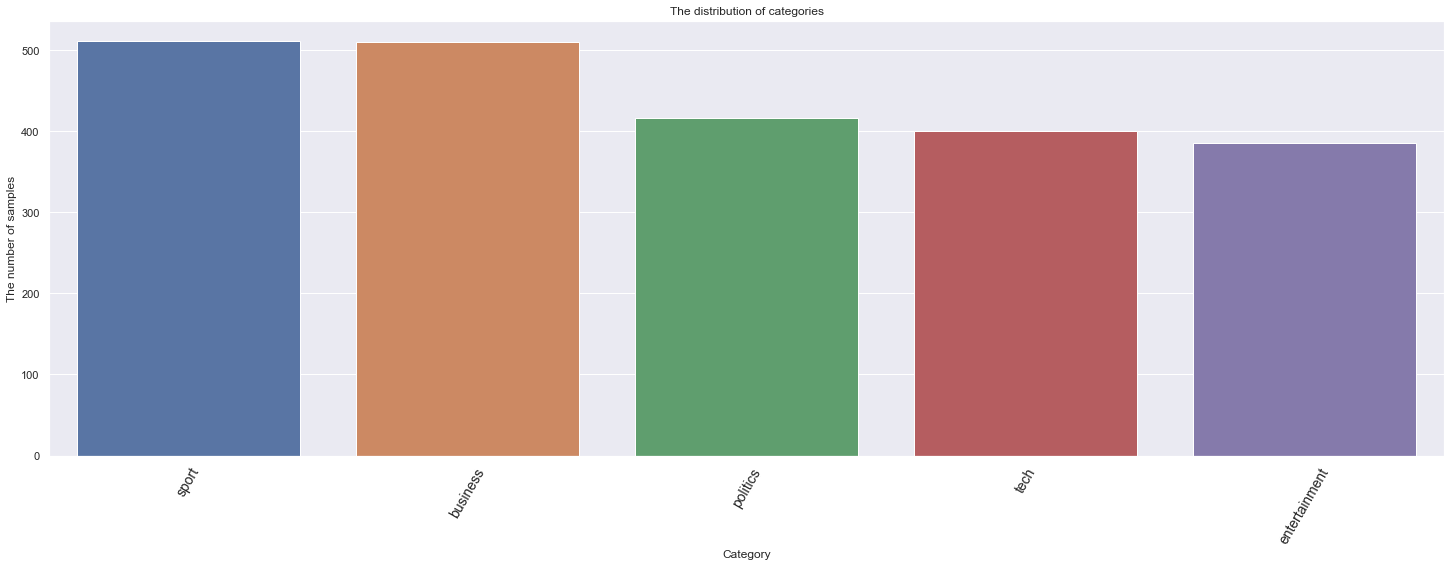

In [8]:
plt.figure(figsize=(25,8))
sns.barplot(x=category.index,y=category.values)
plt.title("The distribution of categories")
plt.xlabel("Category")
plt.ylabel("The number of samples")

plt.xticks(rotation=60,fontsize = 14)
plt.show()

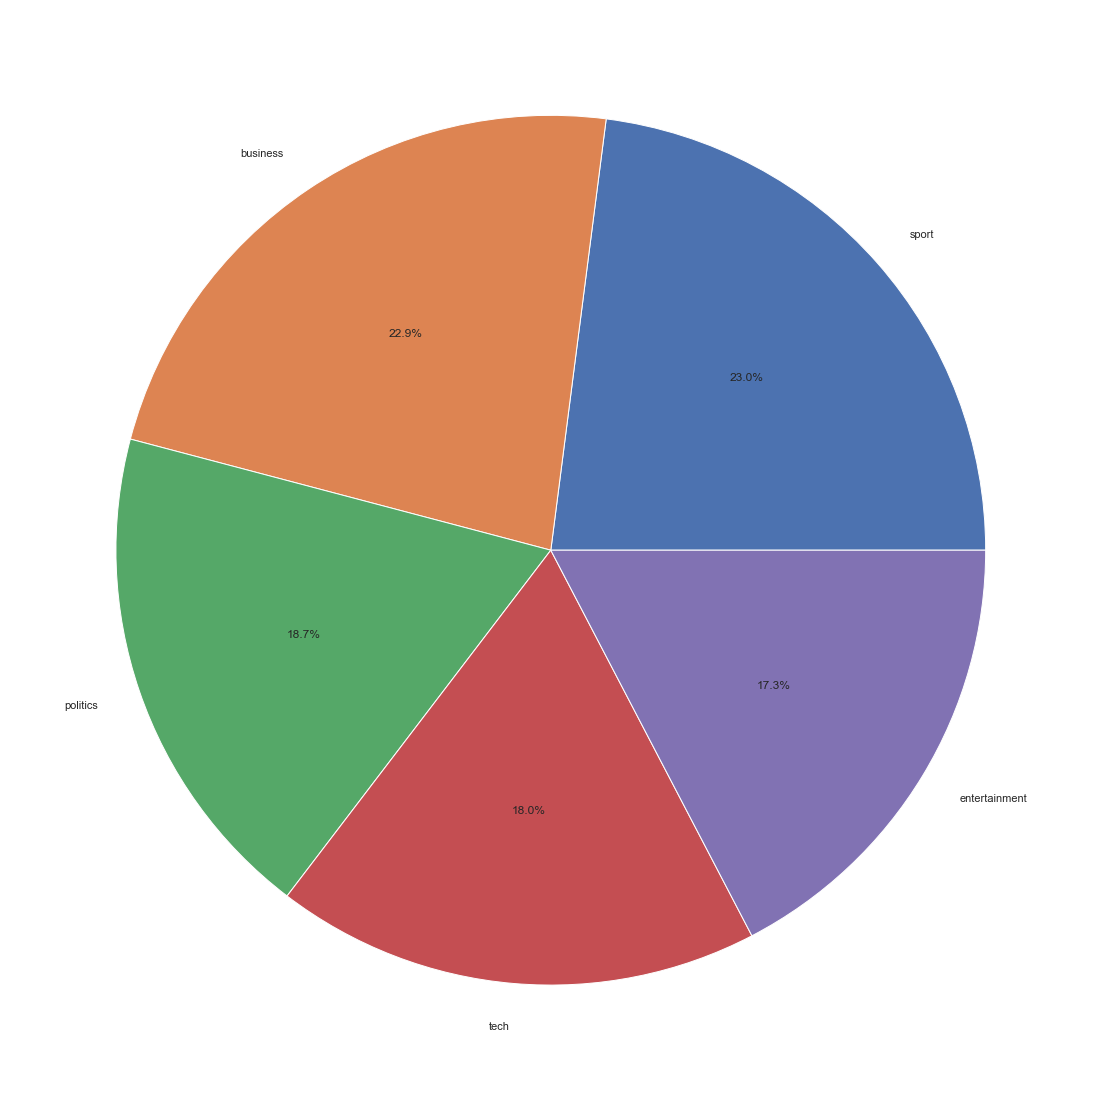

<Figure size 432x288 with 0 Axes>

In [9]:
#pie chart 
plt.figure(figsize=(20,20))
plt.pie(category.values, autopct="%1.1f%%", labels=category.index)
plt.show()
plt.savefig(r"./category_pie.png")

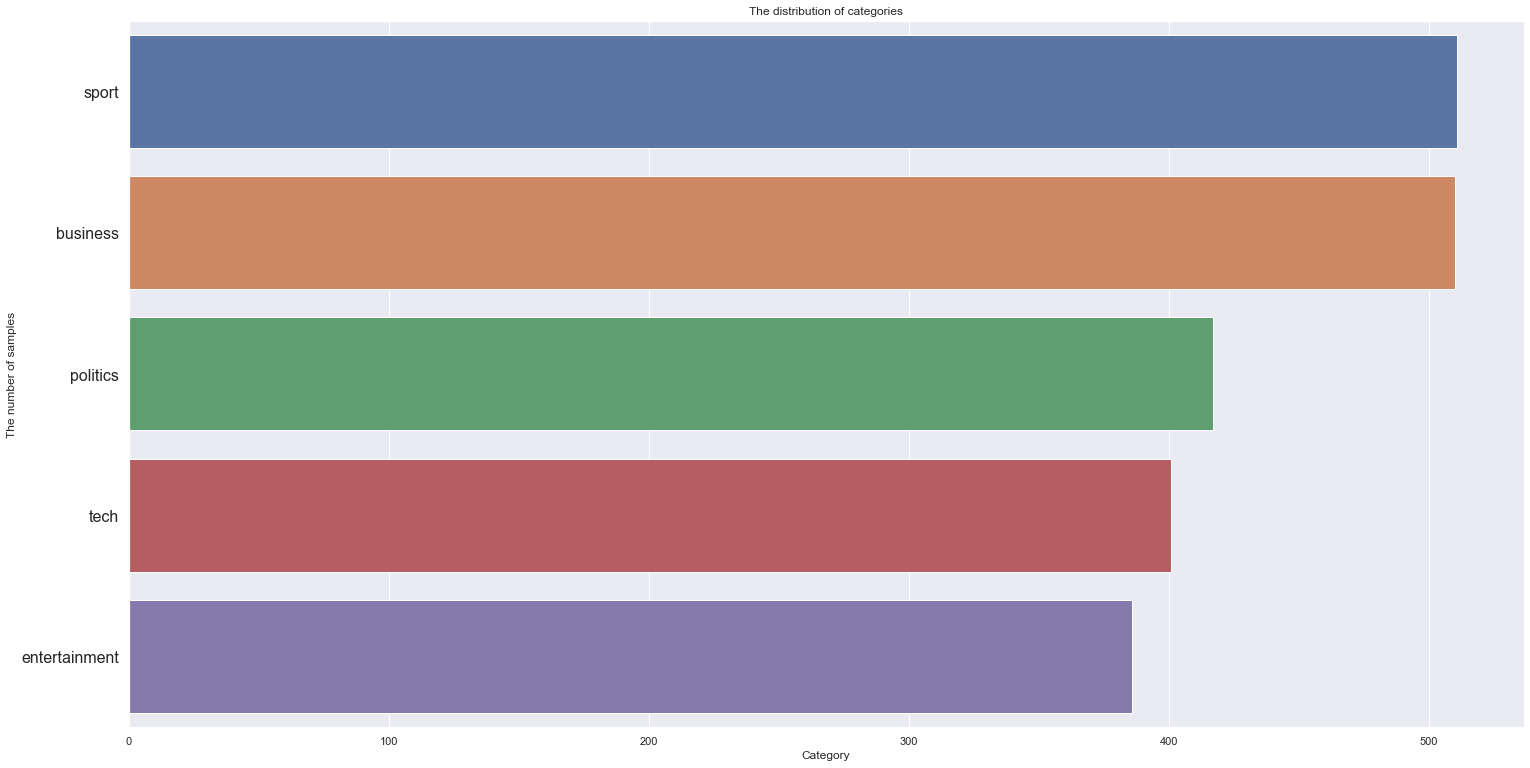

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(25,13))
sns.barplot(y=category.index,x=category.values)
plt.title("The distribution of categories")
plt.xlabel("Category")
plt.ylabel("The number of samples")

plt.yticks(rotation=0,fontsize = 16)
plt.show()
plt.savefig(r"./category_bar.png")

# Handling the null and duplicate values in dataset


In [11]:
#delete the dublicate values
df.duplicated().sum() # count the total duplicate samples

99

In [12]:
df.drop_duplicates(keep='last',inplace=True)

In [13]:
df.duplicated(subset=['category', 'text']).sum()

0

In [14]:
print("THe length of the datset after dublicate deletion------>",df.shape)

THe length of the datset after dublicate deletion------> (2126, 2)


#   Handling null values

In [15]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [16]:
# Associate Category names with numerical index and save it in new column category_id
df['category_id'] = df['category'].factorize()[0]

#View first 10 entries of category_id, as a sanity check
df['category_id'][0:10]

0     0
1     1
2     2
3     2
5     3
6     3
7     2
8     2
9     4
10    4
Name: category_id, dtype: int64

In [17]:
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')

In [18]:
category_id_df

,category,category_id
0,tech,0
1,business,1
2,sport,2
5,politics,3
9,entertainment,4


In [19]:
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [20]:
id_to_category

{0: 'tech', 1: 'business', 2: 'sport', 3: 'politics', 4: 'entertainment'}

In [21]:
df.sample(5, random_state=0)

,category,text,category_id
703,sport,owen set for skipper role wales number eight m...,2
1829,business,wipro beats forecasts once again wipro india ...,1
1308,entertainment,fockers retain film chart crown comedy meet th...,4
1904,tech,no half measures with half-life 2 could half-l...,0
882,tech,web logs aid disaster recovery some of the mos...,0


In [22]:
# create a list of categories
total_categories = df.category.unique()
#create a list of responses for each categories using a list comprehension
corpus = [' '.join(df[(df.category==categories)].text.tolist()) for categories in total_categories]

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
# utilize the new STOP_WORDS list
cv=CountVectorizer( stop_words=STOPWORDS, ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=total_categories

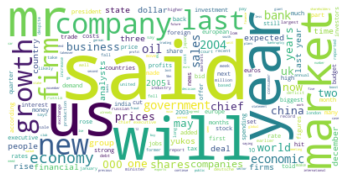

In [23]:
# create a pandas Series of the top 1000 most frequent words
text=bow.loc['business'].sort_values(ascending=False)[:1000]

# create a dictionary Note: you could pass the pandas Series directoy into the wordcloud object
text2_dict=bow.loc['business'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

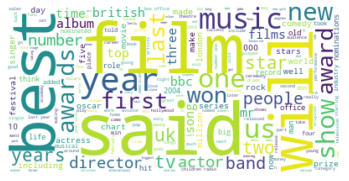

In [24]:
text=bow.loc['entertainment'].sort_values(ascending=False)[:1000]


text2_dict=bow.loc['entertainment'].sort_values(ascending=False).to_dict()

wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

wordcloud.generate_from_frequencies(text2_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

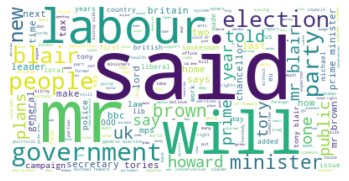

In [25]:
text=bow.loc['politics'].sort_values(ascending=False)[:1000]


text2_dict=bow.loc['politics'].sort_values(ascending=False).to_dict()

wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

wordcloud.generate_from_frequencies(text2_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

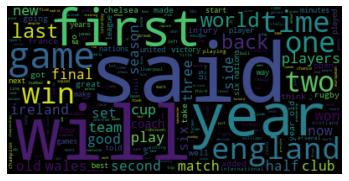

In [26]:
text=bow.loc['sport'].sort_values(ascending=False)[:1000]


text2_dict=bow.loc['sport'].sort_values(ascending=False).to_dict()

wordcloud = WordCloud(min_word_length =3,
                      background_color='black')

wordcloud.generate_from_frequencies(text2_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

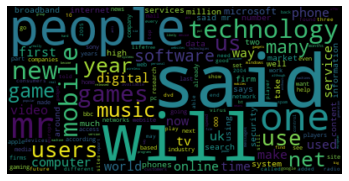

In [27]:
text=bow.loc['tech'].sort_values(ascending=False)[:1000]


text2_dict=bow.loc['tech'].sort_values(ascending=False).to_dict()

wordcloud = WordCloud(min_word_length =3,
                      background_color='black')

wordcloud.generate_from_frequencies(text2_dict)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
import os
import sys
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.layers import MaxPool1D
from keras.models import Model
from nltk.tokenize import word_tokenize
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [29]:
# make the max word length to be constant
MAX_WORDS = 10000
MAX_SEQUENCE_LENGTH = 1000
# the percentage of train test split to be applied
VALIDATION_SPLIT = 0.20
# the dimension of vectors to be used
EMBEDDING_DIM = 100
# filter sizes of the different conv layers 
filter_sizes = [3,4,5]
num_filters = 512
embedding_dim = 100
# dropout probability
drop = 0.5
batch_size = 30
epochs = 2

In [30]:
words = []
for i in df.text.values:
    words.append(i.split())
words[:5]

[['tv',
  'future',
  'in',
  'the',
  'hands',
  'of',
  'viewers',
  'with',
  'home',
  'theatre',
  'systems',
  'plasma',
  'high-definition',
  'tvs',
  'and',
  'digital',
  'video',
  'recorders',
  'moving',
  'into',
  'the',
  'living',
  'room',
  'the',
  'way',
  'people',
  'watch',
  'tv',
  'will',
  'be',
  'radically',
  'different',
  'in',
  'five',
  'years',
  'time.',
  'that',
  'is',
  'according',
  'to',
  'an',
  'expert',
  'panel',
  'which',
  'gathered',
  'at',
  'the',
  'annual',
  'consumer',
  'electronics',
  'show',
  'in',
  'las',
  'vegas',
  'to',
  'discuss',
  'how',
  'these',
  'new',
  'technologies',
  'will',
  'impact',
  'one',
  'of',
  'our',
  'favourite',
  'pastimes.',
  'with',
  'the',
  'us',
  'leading',
  'the',
  'trend',
  'programmes',
  'and',
  'other',
  'content',
  'will',
  'be',
  'delivered',
  'to',
  'viewers',
  'via',
  'home',
  'networks',
  'through',
  'cable',
  'satellite',
  'telecoms',
  'companies',


In [31]:
import gensim
#Dimension of vectors we are generating
EMBEDDING_DIM = 200

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences = words , size=EMBEDDING_DIM , window = 5 , min_count = 1)

In [32]:
#vocab size
len(w2v_model.wv.vocab)
#We have now represented each of 38071 words by a 100dim vector.

43771

In [33]:
 import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

In [34]:
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen = 20)

In [35]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [36]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [37]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

# TRAINING WORD2VEC MODEL

In [38]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 200)           8754400   
_________________________________________________________________
bidirectional (Bidirectional (None, 20, 256)           336896    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                55680     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 9,147,041
Trainable params: 9,147,041
Non-trainable params: 0
_________________________________________________________________


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, df.text , test_size = 0.3 , random_state = 0) 

In [41]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 25)


Epoch 1/25
469/469 [==============================] - 3s 5ms/step - loss: 0.6573 - acc: 0.8131 - val_loss: 0.1884 - val_acc: 0.9453
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.2043 - acc: 0.9413 - val_loss: 0.1341 - val_acc: 0.9606
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.1481 - acc: 0.9572 - val_loss: 0.1102 - val_acc: 0.9655
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.1150 - acc: 0.9667 - val_loss: 0.0953 - val_acc: 0.9686
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.0985 - acc: 0.9714 - val_loss: 0.0835 - val_acc: 0.9727
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 0.0877 - acc: 0.9731 - val_loss: 0.0759 - val_acc: 0.9758
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.0730 - acc: 0.9784 - val_loss: 0.0759 - val_acc: 0.9759
Epoch 8/25
469/469 [==============================] - 1s 2ms/step - loss: 0.

In [42]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0063 - acc: 0.9989
Accuracy of the model on Training Data is -  99.88666772842407
313/313 [==============================] - 0s 837us/step - loss: 0.0662 - acc: 0.9813
Accuracy of the model on Testing Data is -  98.12999963760376


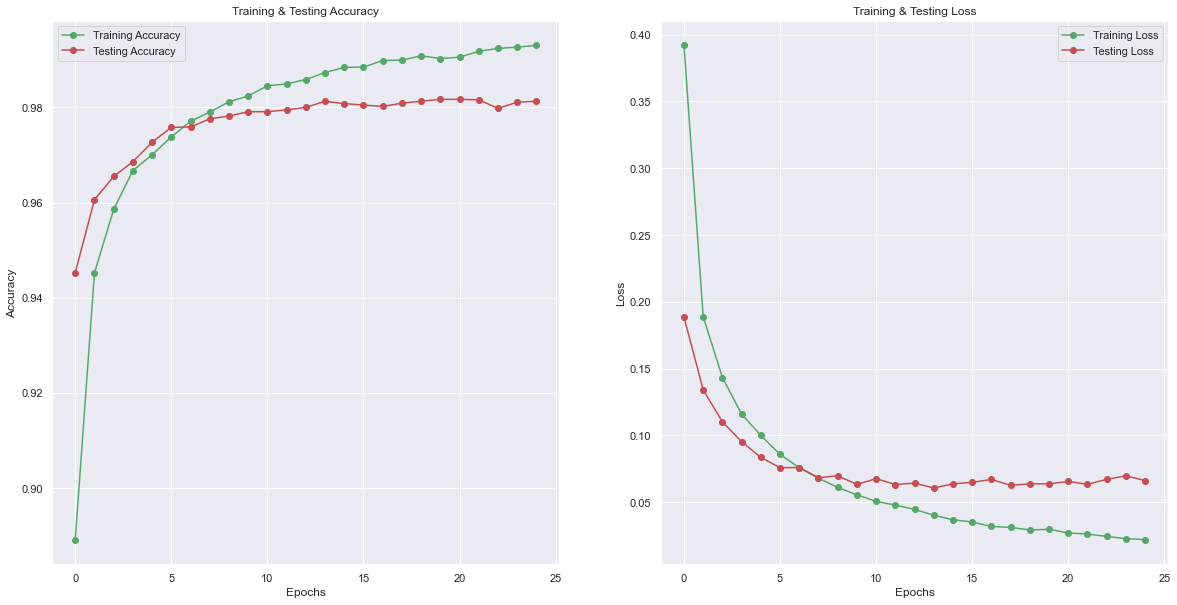

In [43]:
epochs = [i for i in range(25)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [44]:
pred = model.predict_classes(x_test)
pred[:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [45]:
cm = confusion_matrix(y_test,pred)
cm

array([[ 972,    1,    0,    0,    0,    1,    3,    1,    2,    0],
       [   0, 1128,    2,    1,    0,    0,    2,    0,    2,    0],
       [   4,    1, 1012,    3,    2,    0,    2,    4,    3,    1],
       [   0,    0,    7,  991,    0,    3,    0,    4,    2,    3],
       [   1,    0,    1,    1,  960,    0,    7,    1,    0,   11],
       [   2,    0,    0,    9,    1,  870,    5,    1,    2,    2],
       [   3,    2,    1,    1,    1,    4,  946,    0,    0,    0],
       [   3,    5,   11,    1,    1,    0,    0, 1000,    2,    5],
       [   5,    0,    1,    4,    4,    3,    2,    4,  947,    4],
       [   1,    3,    0,    5,    9,    0,    0,    4,    0,  987]],
      dtype=int64)

<AxesSubplot:>

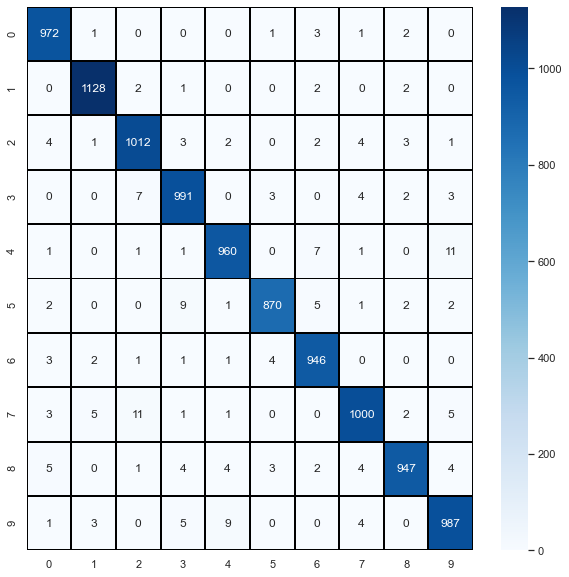

In [46]:
cm = pd.DataFrame(cm)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

# introduction to Glove

In [47]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.category, test_size = 0.3 , random_state = 0)

In [48]:
max_features = 35000
maxlen = 200

In [49]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [50]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [51]:
EMBEDDING_FILE = 'D:/glove.6B.100d.txt'

In [52]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE,encoding="utf8"))

In [53]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]



word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [54]:
batch_size = 128
epochs = 25
embed_size = 100

In [55]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(nb_words, output_dim=embed_size, weights=[embedding_matrix], input_length=200, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          2547700   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               234496    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 2,782,453
Trainable params: 2,782,453
Non-trainable params: 0
_________________________________________________________________


In [57]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 30)


Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.6845 - acc: 0.7994 - val_loss: 0.1968 - val_acc: 0.9422
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2067 - acc: 0.9404 - val_loss: 0.1369 - val_acc: 0.9586
Epoch 3/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1515 - acc: 0.9551 - val_loss: 0.1132 - val_acc: 0.9660
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.1208 - acc: 0.9651 - val_loss: 0.0959 - val_acc: 0.9716
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0969 - acc: 0.9720 - val_loss: 0.0841 - val_acc: 0.9749
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0881 - acc: 0.9735 - val_loss: 0.0811 - val_acc: 0.9759
Epoch 7/30
469/469 [==============================] - 1s 2ms/step - loss: 0.0743 - acc: 0.9781 - val_loss: 0.0737 - val_acc: 0.9779
Epoch 8/30
469/469 [==============================] - 1s 2ms/step - loss: 0.

In [58]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0039 - acc: 0.9993
Accuracy of the model on Training Data is -  99.92666840553284
313/313 [==============================] - 0s 849us/step - loss: 0.0713 - acc: 0.9822
Accuracy of the model on Testing Data is -  98.2200026512146


# CNN with word Embeddings

In [59]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [63]:
embedded_sentences = [one_hot(sent, 50) for sent in corpus]


In [64]:
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))

In [65]:
padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
print(padded_sentences)

[[20  8 44 ...  0  0  0]
 [20 24 28 ...  0  0  0]
 [ 7 26 28 ...  0  0  0]
 [35 11 46 ...  0  0  0]
 [29 34 49 ...  0  0  0]]


In [66]:
model = Sequential()
model.add(Embedding(50, 20, input_length=length_long_sentence))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [67]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 195682, 20)        1000      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3913640)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3913641   
Total params: 3,914,641
Trainable params: 3,914,641
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(padded_sentences, text, epochs=25, verbose=1)